In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from tqdm import tqdm
from scipy.interpolate import UnivariateSpline
from numpy.polynomial import chebyshev
from scipy import optimize
from math import pi

import sys
sys.path.append('../')

import unknown_utils
import importlib

In [4]:
dir = "/home/gridsan/tmackey/cdvae/scripts/XRD_CDVAE/Freedman_Lab_Compounds/CoBi"

In [5]:
import os

def rename_files(directory):
    # Define a mapping of old to new prefixes
    name_mapping = {
        'CoBi': 'Fa_Co_Bi',
    }

    for filename in os.listdir(directory):
        if filename.endswith(".xy"):
            # Extract the prefix and the rest of the filename
            prefix, suffix = filename.split('_', 1)
            if prefix in name_mapping:
                new_filename = f"{name_mapping[prefix]}_{suffix}"
                old_path = os.path.join(directory, filename)
                new_path = os.path.join(directory, new_filename)
                os.rename(old_path, new_path)
                print(f"Renamed {filename} to {new_filename}")

rename_files(dir)

In [ ]:
CoBi_1 = pd.read_csv(os.path.join(dir, filename), sep='\s+', header=None)
column_names = list(CoBi_1.columns)
CoBi_1[column_names[0]]  = CoBi_1[column_names[0]]  *  1.5406 / 0.406626
#save the data
CoBi_1.to_csv(os.path.join(dir, filename), sep=' ', header=False, index=False)

In [23]:
dictionary_of_cifs = unknown_utils.stoichioemtry_extraction(dir)

pv_xrd_dict_0.pt
Fa_Co_Bi_4.xy
['Co', 'Bi']


In [24]:
dictionary_of_cifs

{'Fa_Co_Bi_4.xy': ["# generated using pymatgen\ndata_CoBi\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   3.56007511\n_cell_length_b   3.56007511\n_cell_length_c   3.56007511\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   CoBi\n_chemical_formula_sum   'Co1 Bi1'\n_cell_volume   45.12087192\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Co  Co0  1  0.11783776  0.53057610  0.59352850  1\n  Bi  Bi1  1  0.75564674  0.96530671  0.15544256  1\n"]}

In [25]:
index = 0
keyvalue = list(dictionary_of_cifs.keys())[index]
print(keyvalue)
print(dictionary_of_cifs[keyvalue][0])

Fa_Co_Bi_4.xy
# generated using pymatgen
data_CoBi
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.56007511
_cell_length_b   3.56007511
_cell_length_c   3.56007511
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   CoBi
_chemical_formula_sum   'Co1 Bi1'
_cell_volume   45.12087192
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Co  Co0  1  0.11783776  0.53057610  0.59352850  1
  Bi  Bi1  1  0.75564674  0.96530671  0.15544256  1



In [26]:
df = unknown_utils.create_dataframe(dictionary_of_cifs)

In [27]:
df

,cif,filename,material_id,formation_energy_per_atom,spacegroup.number,xrd_peak_intensities,xrd_peak_locations,disc_sim_xrd,atomic_numbers
0,# generated using pymatgen\ndata_CoBi\n_symmet...,Fa_Co_Bi_4.xy,Fa_Co_Bi_4_1x,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[27, 83]"


In [28]:
unknown_utils.create_xrd_test_data(dir, df)

start index:  0
end index:  1
total length:  1


  0%|          | 0/1 [00:00<?, ?it/s]

This model may perform poorly on data with a complicated background


100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


In [29]:
xrd_adjusted = torch.load(os.path.join(dir, "pv_xrd_dict_0.pt"))

In [30]:
pv_xrd_for_testing = unknown_utils.create_xrd_for_testing(xrd_adjusted, df)

Fa_Co_Bi_4.xy


Fa_Co_Bi_4.xy


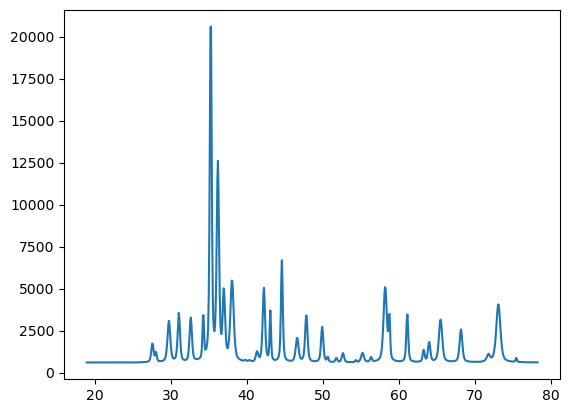

In [31]:
for filename in os.listdir(dir):
    if ".xy" in filename: 
        #load in the original Ti_Bi data
        print(filename)
        ti_bi_1 = pd.read_csv(os.path.join(dir, filename), sep='\s+', header=None)
        column_names = list(ti_bi_1.columns)
        plt.plot(ti_bi_1[column_names[0]], ti_bi_1[column_names[1]], label = filename)
        plt.show()

Fa_Co_Bi_4_1x


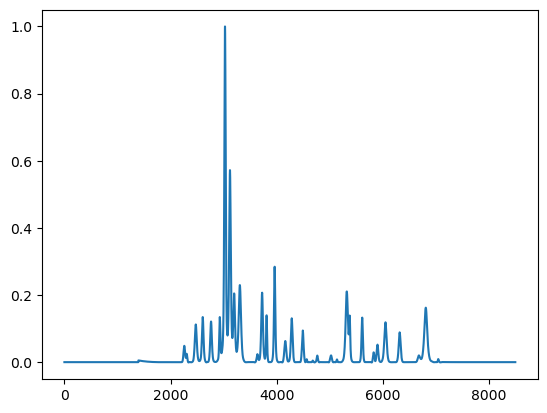

In [32]:
for i in range(len(list(pv_xrd_for_testing.keys()))):
    print(list(pv_xrd_for_testing.keys())[i])
    plt.plot(pv_xrd_for_testing[list(pv_xrd_for_testing.keys())[i]][0].numpy())
    plt.show()
    print("\n")

In [35]:
final_directory = "/home/gridsan/tmackey/cdvae/data/CoBi"

In [36]:
#save pv_xrds to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test_pv_xrd.pt
torch.save(pv_xrd_for_testing, os.path.join(final_directory, "test_pv_xrd.pt"))

#save df to /home/gridsan/tmackey/cdvae/data/Freedman_lab_full_subtraction as test.csv
df.to_csv(os.path.join(final_directory, "test.csv"))

In [37]:
unknown_utils.generate_and_save_graphs(final_directory)

100%|██████████| 1/1 [00:00<00:00,  5.74it/s]
